<a href="https://colab.research.google.com/github/JuanOspinaECI/CAYD/blob/main/QAM256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.3535533905932738, 0.3535533905932738, 0.3535533905932738, 0.3535533905932738, 0.5590169943749475, 0.5590169943749475, 0.5590169943749475, 0.5590169943749475, 0.7905694150420949, 0.7905694150420949, 0.7905694150420949, 0.7905694150420949, 1.0307764064044151, 1.0307764064044151, 1.0307764064044151, 1.0307764064044151, 1.2747548783981961, 1.2747548783981961, 1.2747548783981961, 1.2747548783981961, 1.5206906325745548, 1.5206906325745548, 1.5206906325745548, 1.5206906325745548, 1.7677669529663689, 1.7677669529663689, 1.7677669529663689, 1.7677669529663689, 2.0155644370746373, 2.0155644370746373, 2.0155644370746373, 2.0155644370746373, 0.5590169943749475, 0.5590169943749475, 0.5590169943749475, 0.5590169943749475, 0.7071067811865476, 0.7071067811865476, 0.7071067811865476, 0.7071067811865476, 0.9013878188659973, 0.9013878188659973, 0.9013878188659973, 0.9013878188659973, 1.118033988749895, 1.118033988749895, 1.118033988749895, 1.118033988749895, 1.346291201783626, 1.346291201783626, 1.346

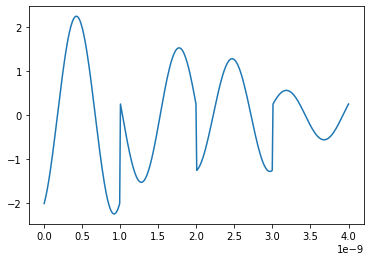

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
import random

#Función para generar vector aletaorio
#tam: es el numero de bloques a generar (8 bits cada uno)
#Retorna una matriz con vectores de 8 bits aletorios (0-1)
def bits_ran(tam):
  bloques = []
  for k in range(0,tam):
    bloque = []
    for j in range(0,8):
      bloque += [random.randint(0, 1)]
    bloques += [bloque]
  return bloques

# Funcion para convertir de lista de binario a decimal
# El parametro bits es un vector de n bits (int 0 - 1)
# La funcion retorna el numero decimal (int)
def conv_bin_dec(bits):
  contador = 0
  suma = 0
  for k in bits: 
    suma += k*2**(contador)
    contador += 1
  return suma

#Creación de vectores y diccionario de modulación (tabla de verdad)

#Creación vectores A Y B 
# A: son las magnitudes del eje x
# B: son las magnitudes del eje y
# Como es modulación 256QAM cada cuadrante tendra 8 magnitudes en x y 8 en y
# Se generan vectores multiplos de 0.25 que hacen referencia a las diferetnes magnitudes de x y (senwt y coswt)
A = []
B = []
for j in range(1,9):
  A += [0.25*j]
  B += [0.25*j]


#Creación de tablas de verdad de Amplitud y Fase
#Seran tablas de 0-255, donde estaran orgnizados según la posicion 
Amplitud = []
Fase = []


for j in range(0,8):
  for k in range(0,8):
    # Cuadrante 1
    Amplitud += [math.sqrt(A[j]**2+B[k]**2)]
    Fase += [math.atan(B[k]/A[j])]
    # Cuadrante 2
    Amplitud += [math.sqrt(A[j]**2+B[k]**2)]
    Fase += [math.pi - math.atan(B[k]/A[j])]
    # Cuadrante 3
    Amplitud += [math.sqrt(A[j]**2+B[k]**2)]
    Fase += [math.pi + math.atan(B[k]/A[j])]
    # Cuadrante 4
    Amplitud += [math.sqrt(A[j]**2+B[k]**2)]
    Fase += [2*math.pi - math.atan(B[k]/A[j])]

#Ver vectores de amplitu y Fase
print(Amplitud)
print(Fase)


#Pedir datos al usuario 

num = int(input("Ingrese numero de bloques de (8 bits)"))
frec_portadora = int(input("Ingrese frecuencia de portadora en Hz"))

#Generar bloques de vectores aleatorios con la funcion bits_ran(num)
bloques_bin = bits_ran(num)

#Generar bloques en formato decimal y señales seno
bloques_dec = [] #Vector para almacenar el valor en decimal de cada bloque (no se utiliza en el procesamiento de datos)

#Vector de tiempo (Vector correspondiente a todos los bloques generados)
t_full=np.linspace(0,1/frec_portadora*num, num = 100*num)

signal = []

for k in range(0,num):
  #Convertir bloques a decimal
  decimal = conv_bin_dec(bloques_bin[k])
  bloques_dec += [decimal]
  #Mostrar el bloque de bits en binario y su respectiva amplitud y fase
  print(bloques_bin[k], "Amplitud", Amplitud[decimal], "Fase",int(Fase[decimal]*180/np.pi) )
  #Generar señale seno por cada bloque
  t = np.linspace(1/frec_portadora*k,1/frec_portadora*(k+1), num = 100)
  signal += [Amplitud[decimal] * np.sin(frec_portadora * 2.0 * np.pi * t + Fase[decimal])]
#print(bloques_dec)


#Concatenar señales seno generadas 
if num == 1:
  signal_2 = signal[0]
for k in range(1,num):
  if k == 1:
    signal_2 = np.concatenate((signal[k-1],signal[k]))
    #print(len(signal_2))
  else:
    signal_2 = np.concatenate((signal_2,signal[k]))
    #print(len(signal_2))

#print(signal_2)
plt.plot(t_full,signal_2)

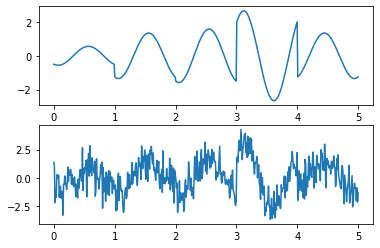

In [69]:
from scipy import signal
noise_desv= 0.9
plt.subplot(2,1,1)
plt.plot(t_full,signal_2)
noise = np.random.normal(0,noise_desv,len(signal_2))
signal_2 += noise
plt.subplot(2,1,2)
plt.plot(t_full,signal_2)